Coding the quantum teleportation circuit

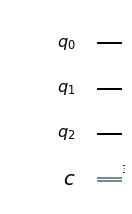

In [1]:
from qiskit import *
circuit = QuantumCircuit(3,3) #creating a quantum circuit
%matplotlib inline
circuit.draw(output = 'mpl')

We will take the information present in q0 to the information present in q2. q1 will be an assisting qubit. For this case we will transfer q0 = 1 from q0 to q2. One can use appropriate gates to change the state q0 to whatever is desired. For example using the hadamard gate will teleport an equal superposition of 0 and 1.

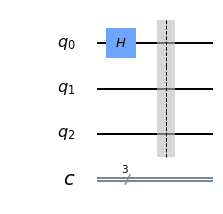

In [2]:
circuit.x(0)
circuit.barrier()
circuit.draw(output = 'mpl')

q0 has obtained the state = 1 now. We will teleport the state 1 to q2.


Starting the teleportation protocol:
1. Create entanglement between q1 and q2.

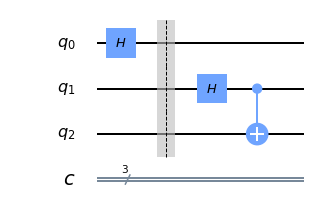

In [3]:
circuit.h(1)
circuit.cx(1,2)
circuit.draw(output = 'mpl')

Completing the teleportation circuit.

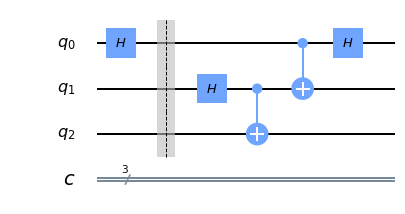

In [4]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output = 'mpl')

Making the measurements needed.

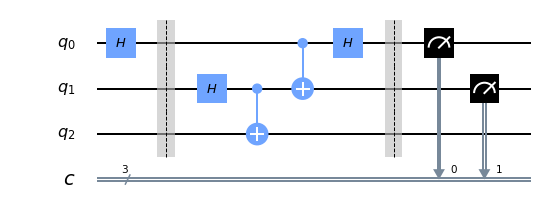

In [5]:
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.draw(output = 'mpl')

In [6]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.measure(2,2)

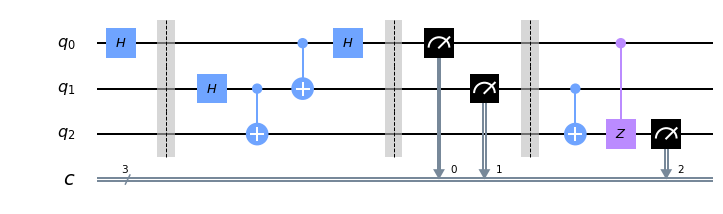

In [7]:
circuit.draw(output = 'mpl')

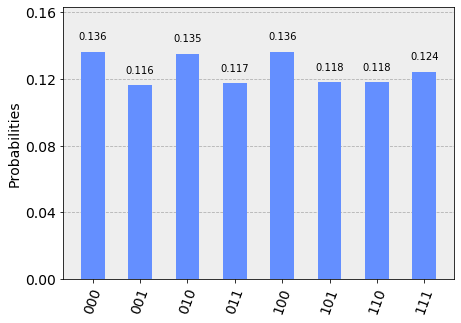

In [9]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)